In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import xfirst

Welcome to JupyROOT 6.28/04


### Load profiles

In [2]:
all_profiles = xfirst.data.load_profiles('data')

### Helper function to process a single cut

In [3]:
def draw_cut(cut, nsamples = 2):
  fcn = xfirst.profile_functions.usp()

  # load parameters and transform into a dictionary
  params = xfirst.data.load_fits(datadir = 'data', cut = cut, columns = fcn.parameter_names)

  # create figure
  nds = len(xfirst.config.datasets)
  npt = len(xfirst.config.particles)
  fig, axes = plt.subplots(nsamples*nds, npt, sharex = True, sharey = True, figsize = (16, 5*nsamples))
  fig.suptitle(f'cut {cut.name}: ${cut.min_depth} \leq X < {cut.max_depth}$', fontsize = 16)

  # loop over datasets
  for ids, d in enumerate(xfirst.config.datasets):
    # loop over primary particles (columns)
    for icol, p in enumerate(xfirst.config.particles):
      profiles = all_profiles[d].loc[p]
      for irow, idx in enumerate(profiles.sample(nsamples).index):
        # max value of the simulated profile
        mx = profiles.loc[idx].max()
        # the simulated profile
        xp = all_profiles['depths']
        yp = profiles.loc[idx]/mx
        # the fitted function
        xf = xp[(xp > cut.min_depth) & (xp < cut.max_depth)]
        yf = fcn(xf, *params[d].loc[(p, idx)])/mx
        # draw both
        ax = axes[nsamples*ids + irow, icol] 
        cl = sns.color_palette()[icol]
        ax.fill_between(xp, yp, color = cl, alpha = 0.4, lw = 0)
        ax.plot(xf, yf, '-', color = cl, lw = 1.5, alpha = 0.8)
        ax.set_ylim(0, None)
        # add information
        if nsamples*ids + irow == nsamples*nds - 1:
          ax.set_xlabel('Slant depth [g cm$^{-2}$]')
        if irow == 0 and ids == 0:
          ax.set_title(p)
        if icol == 0:
          ax.set_ylabel('$\mathrm{d}E/\mathrm{d}X$ [a.u.]')

  fig.tight_layout()

### Draw every cut

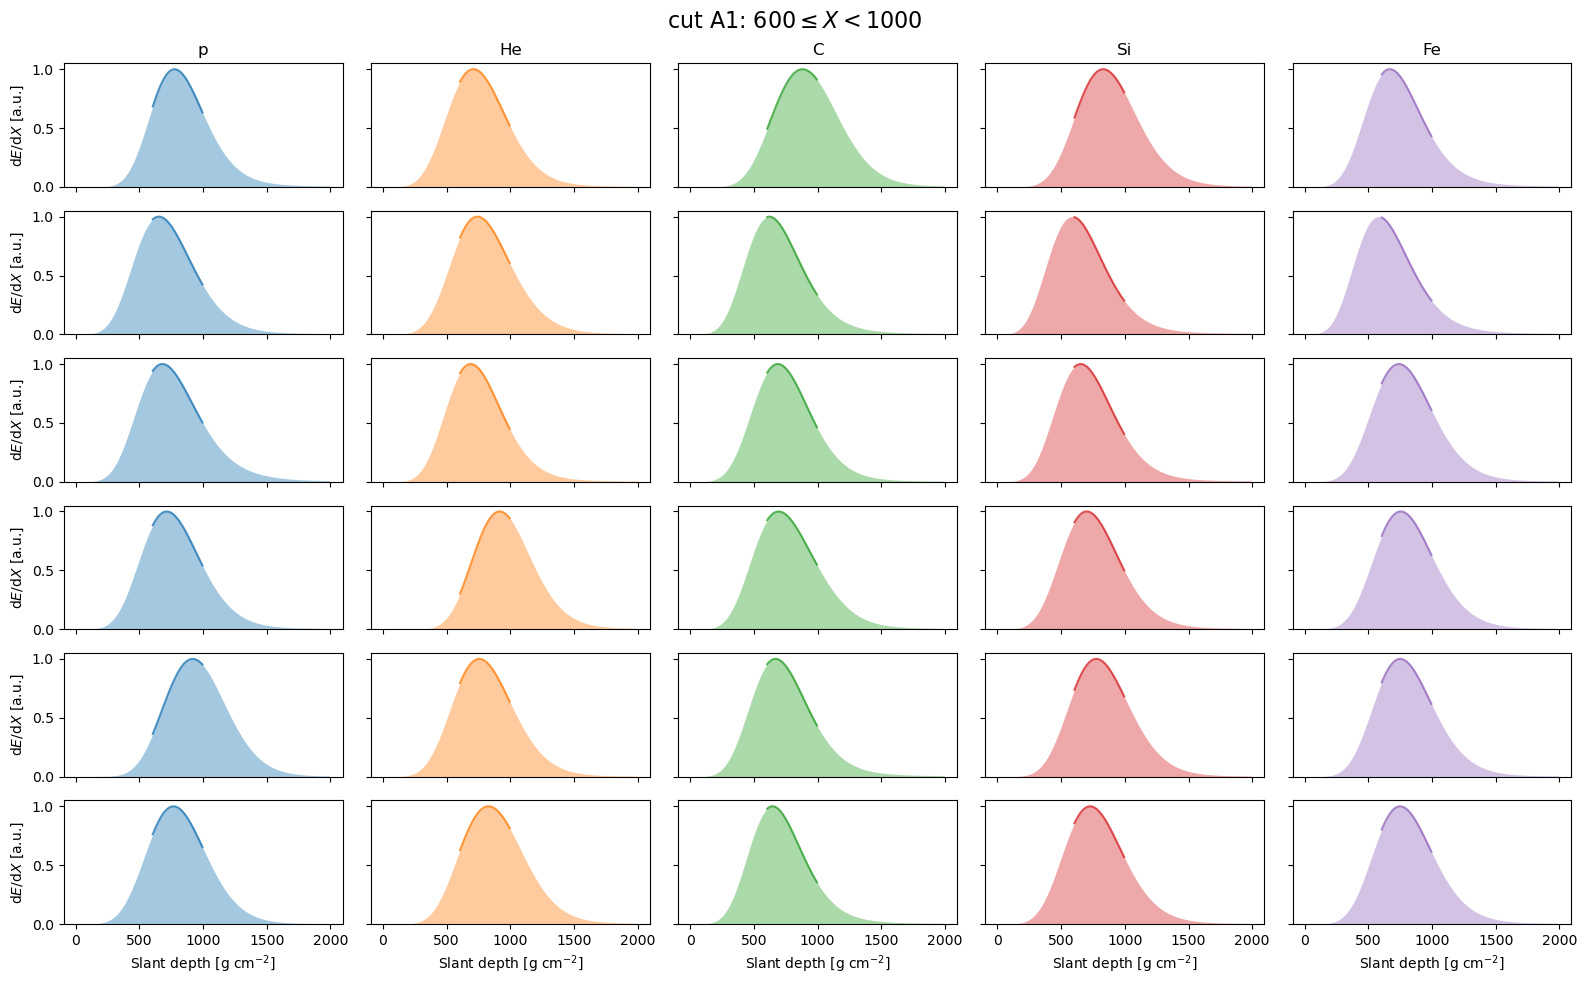

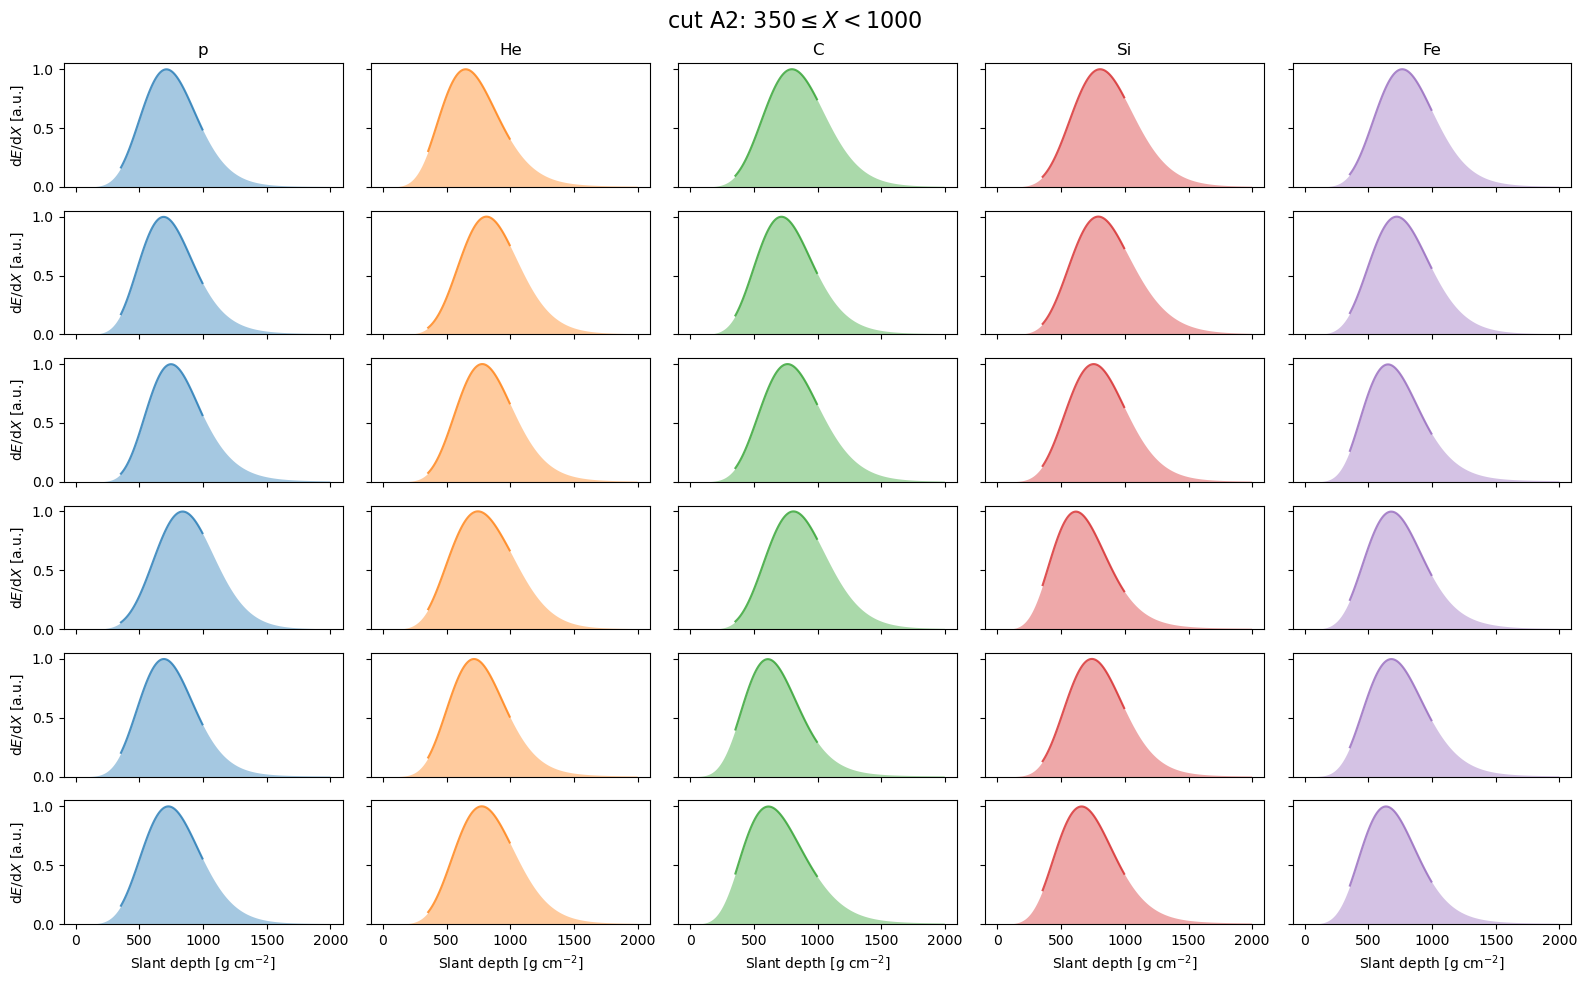

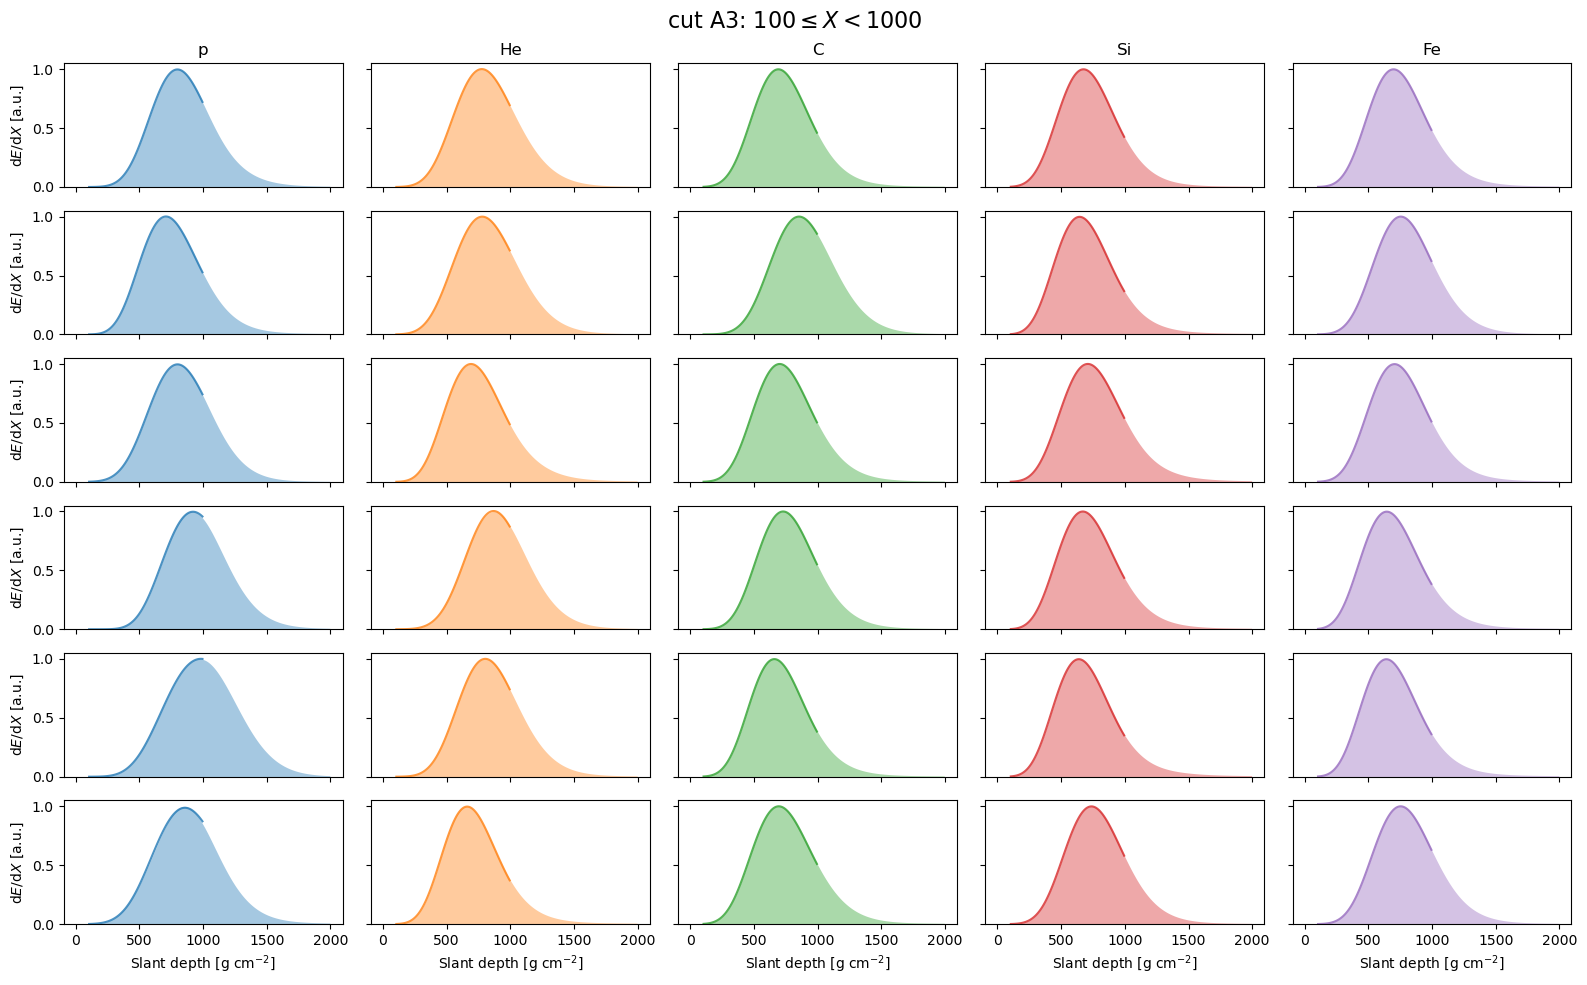

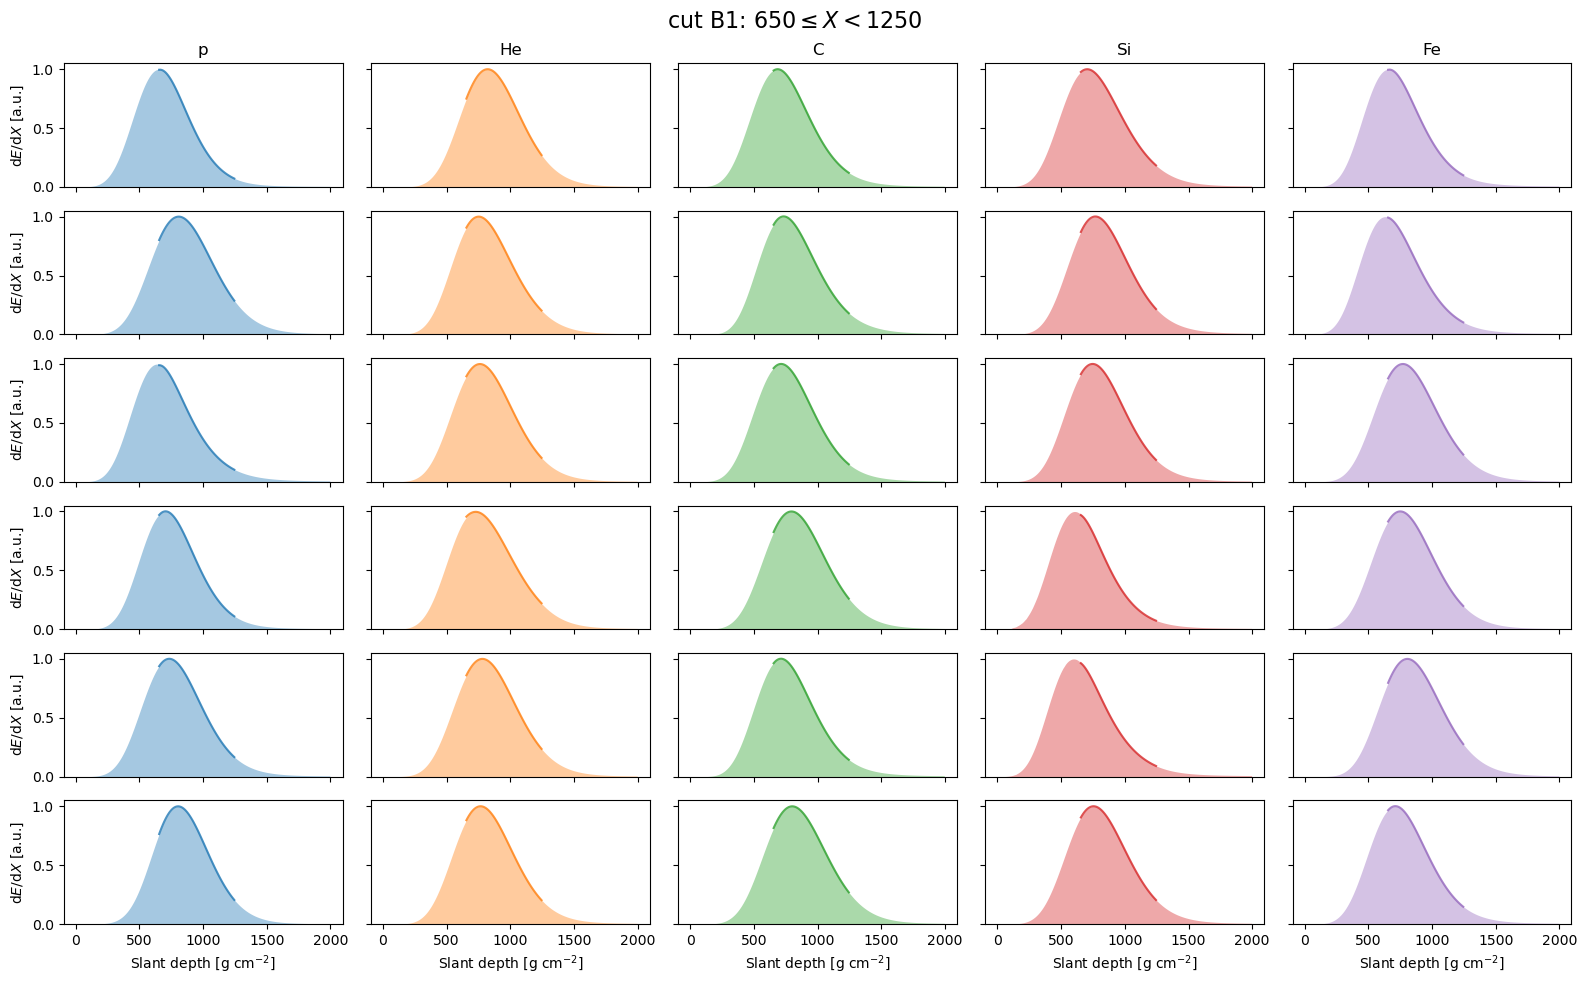

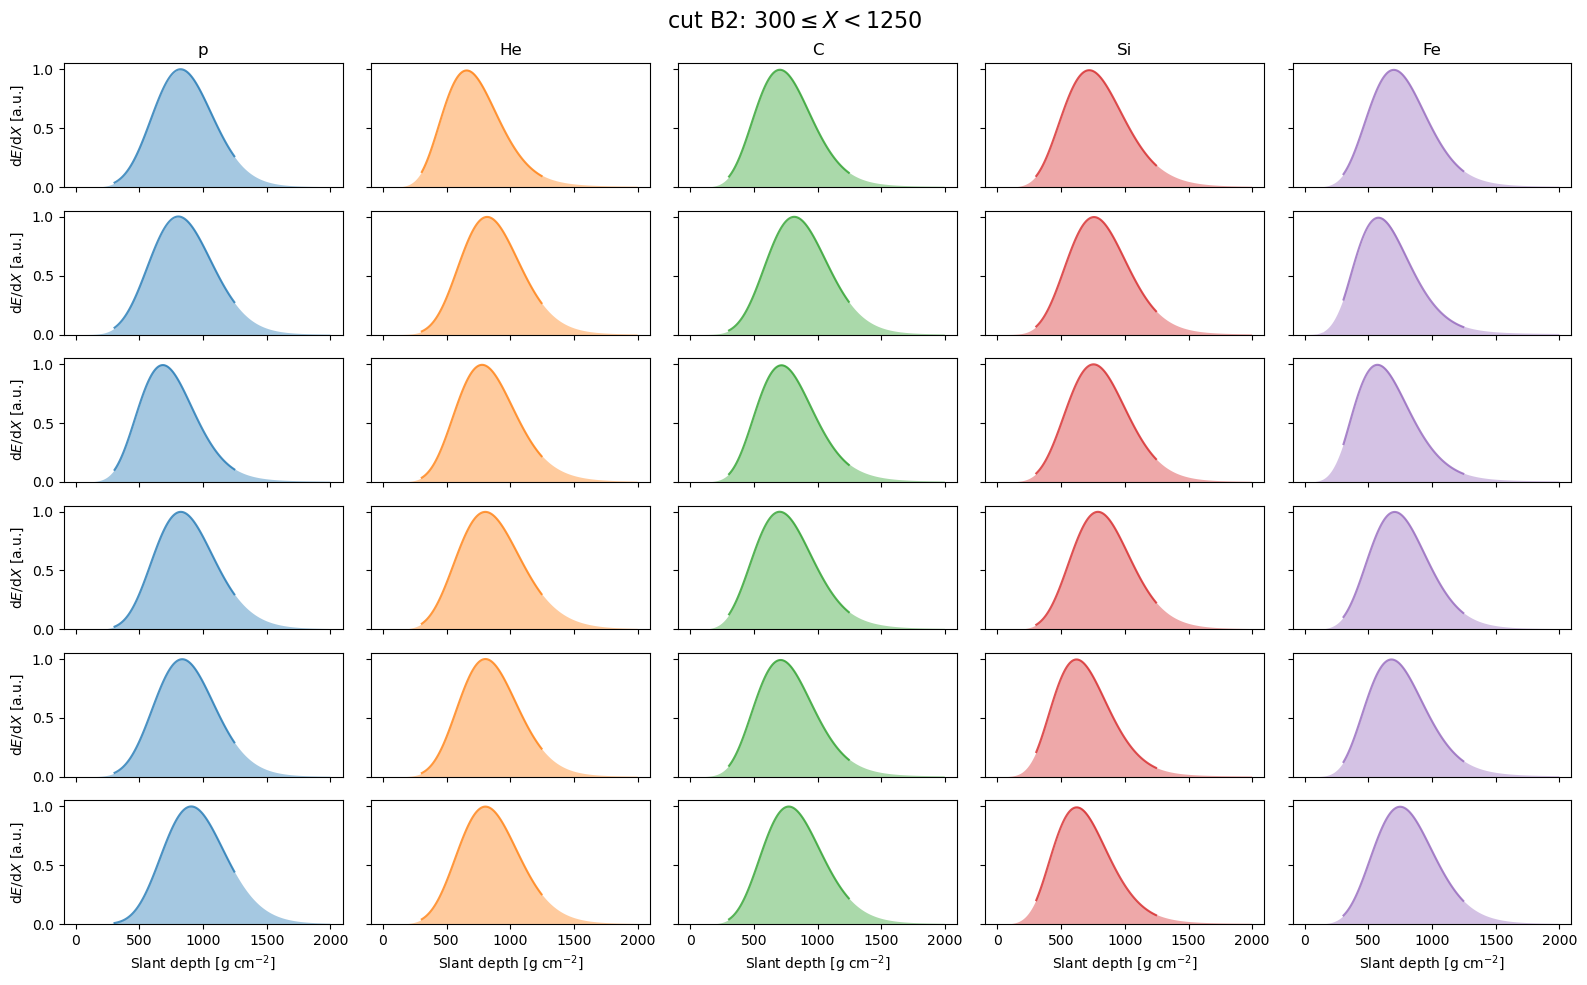

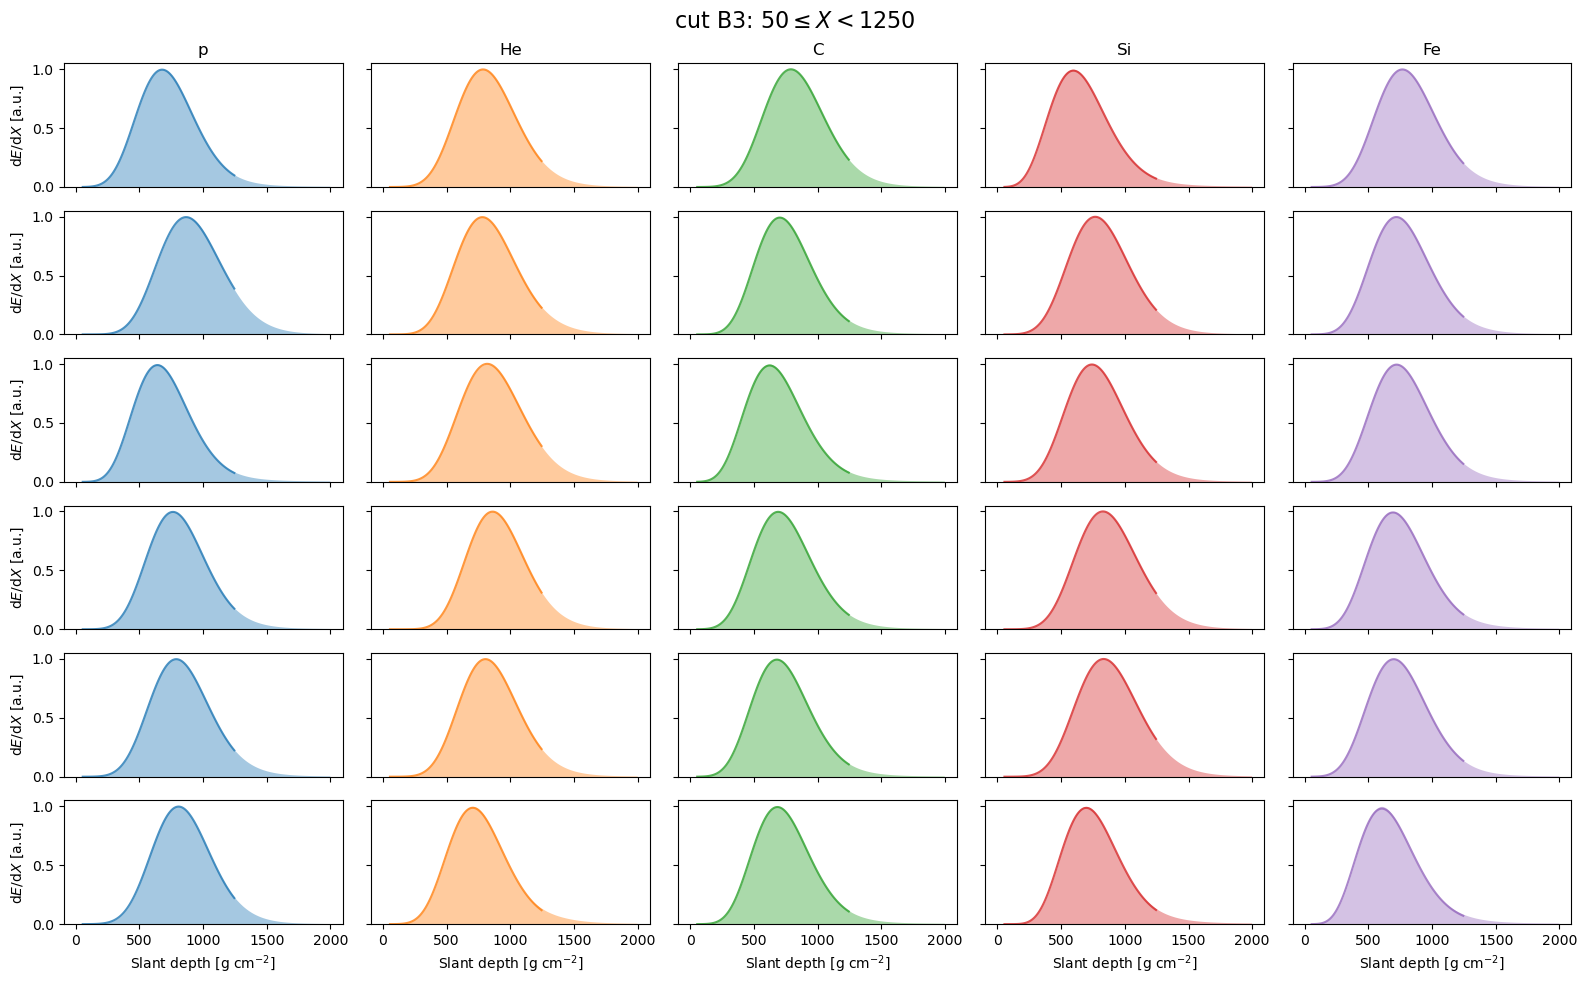

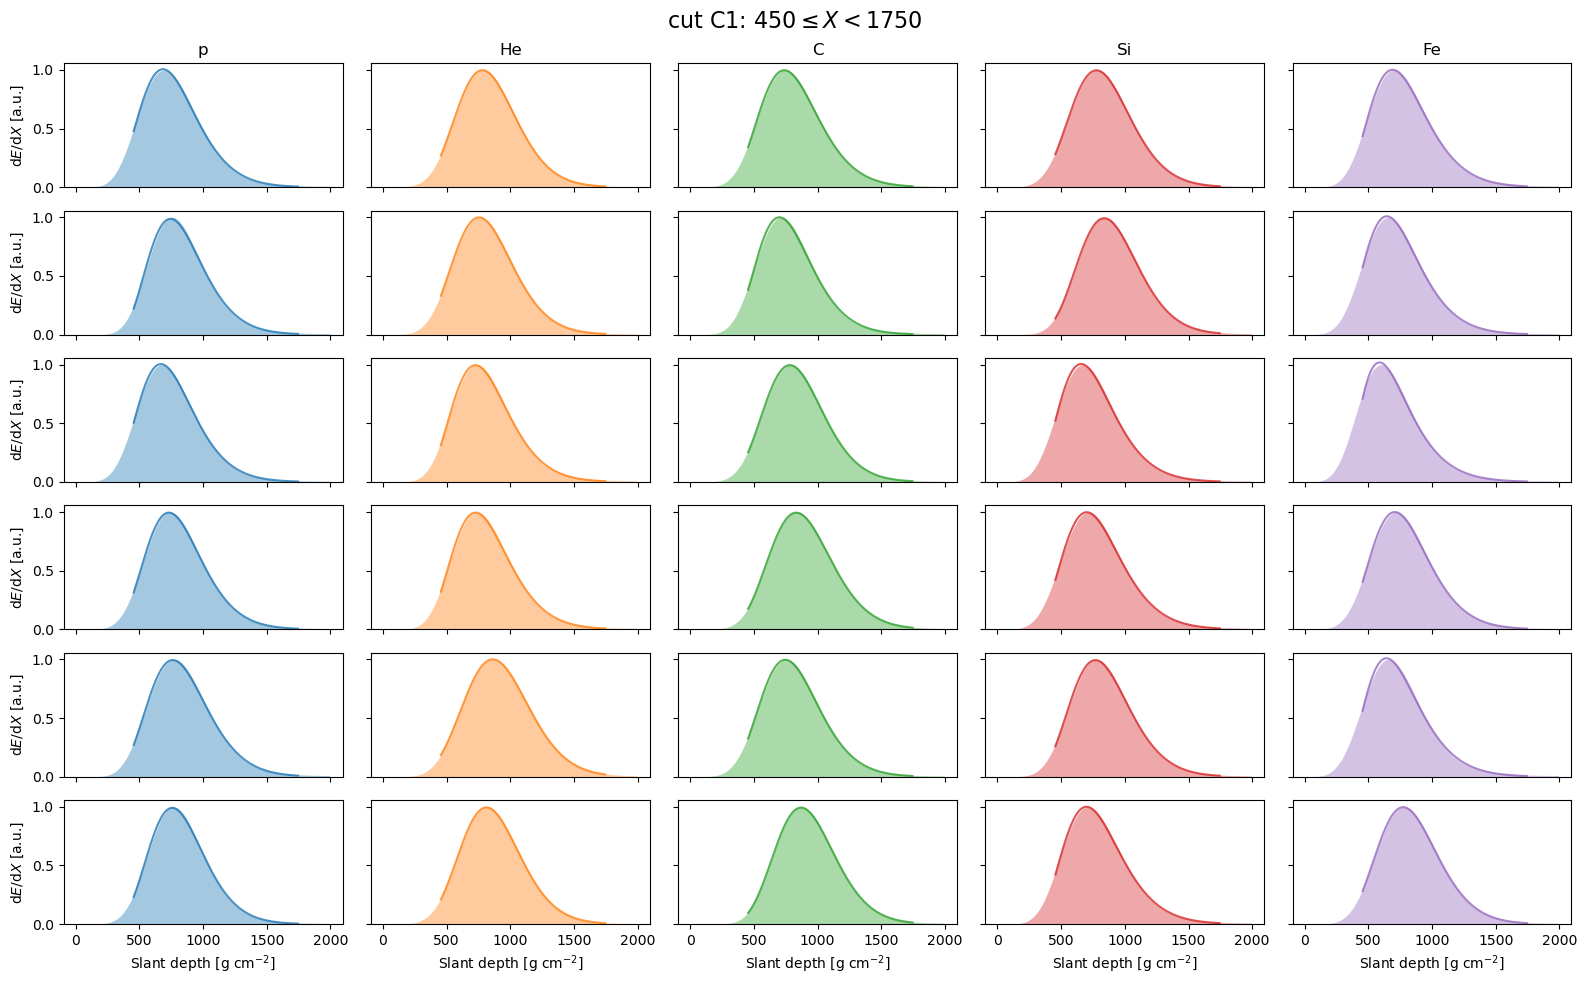

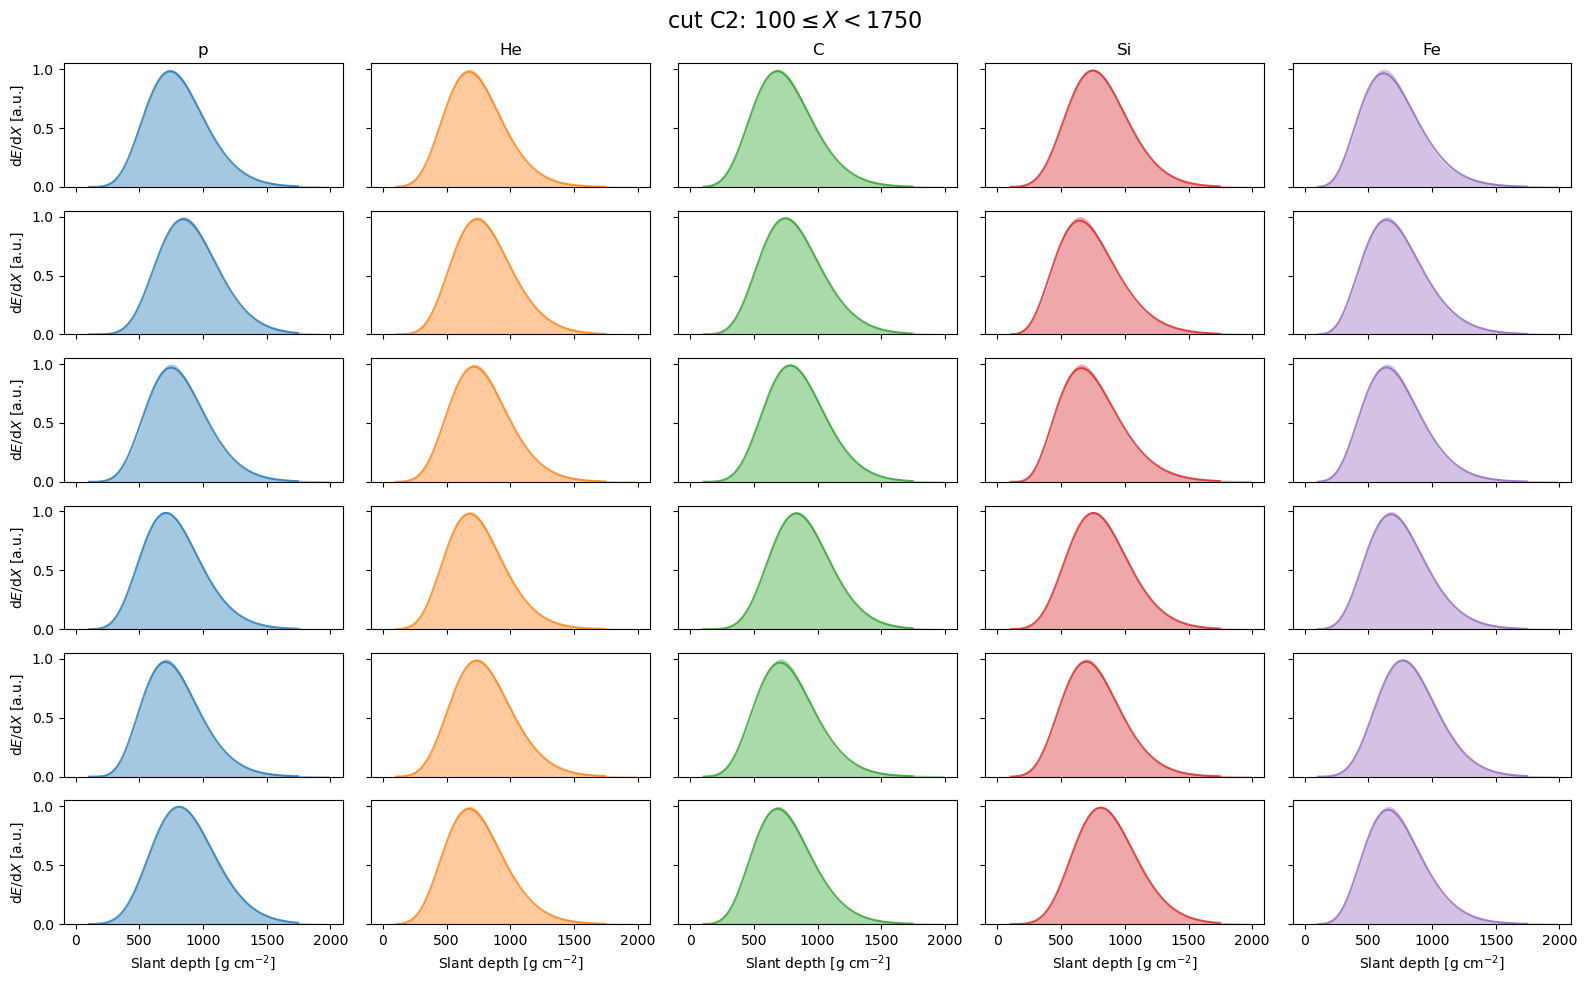

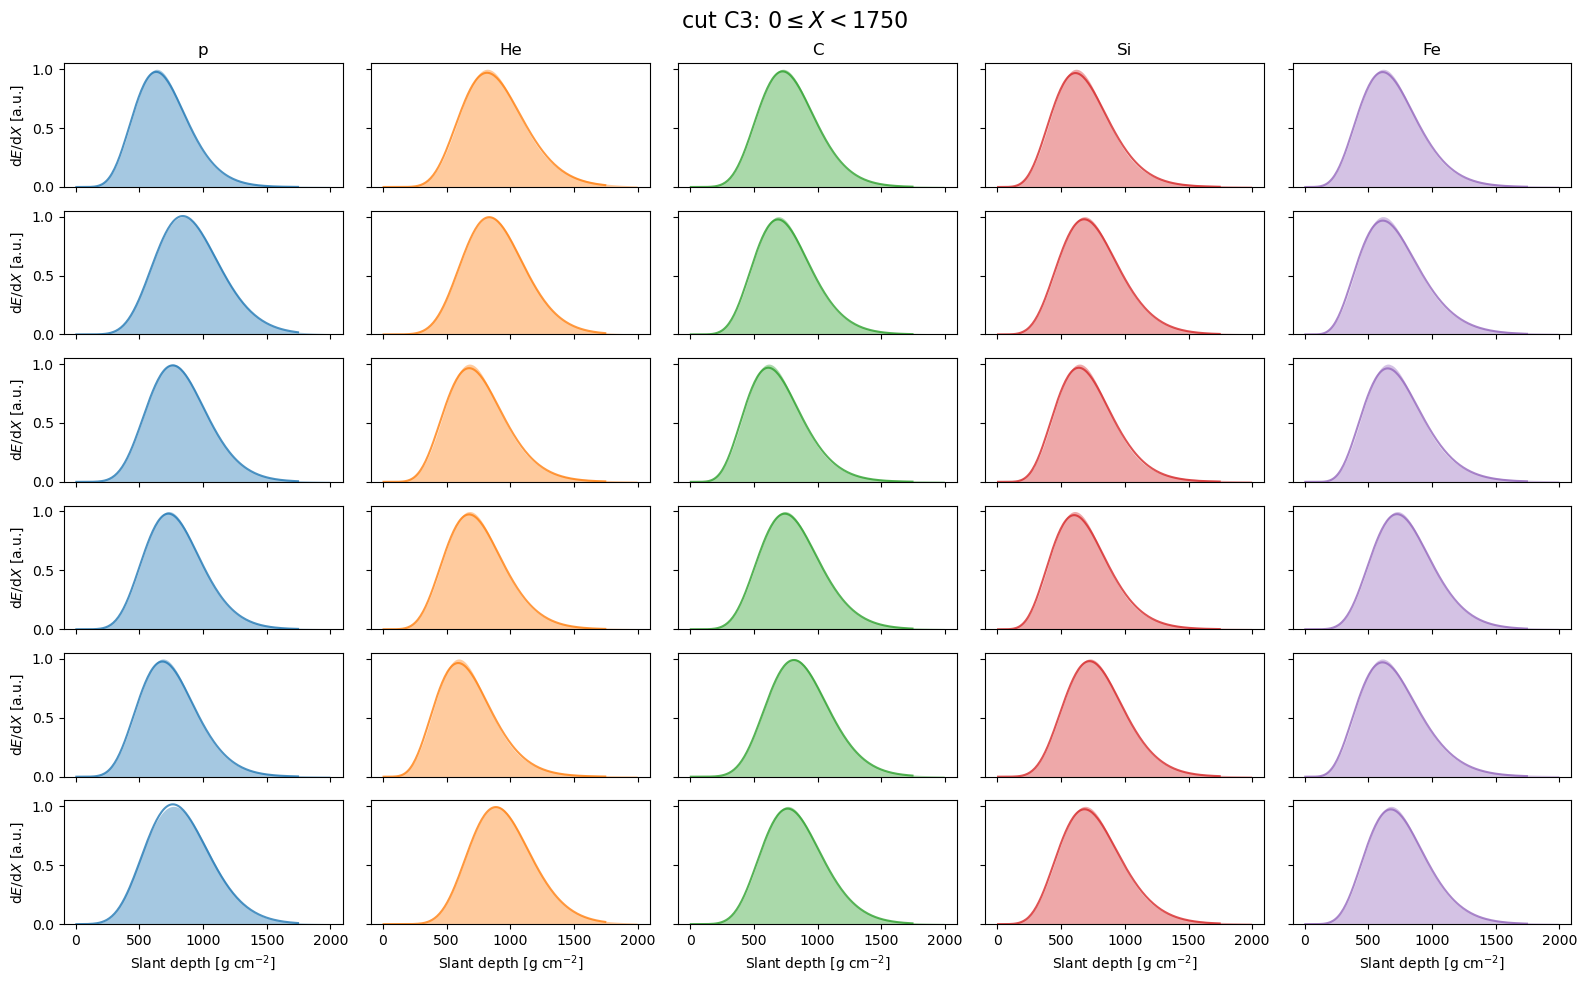

In [4]:
for c in xfirst.config.cuts:
  draw_cut(c)